In this Jupyter notebook, we will focus on basic data analysis for building ML models and constructing various models for predicting outcomes of a classification problem.

In [1]:
#Importing the necessary libraries for analysis and model building.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
#Presenting the data in the datafranme
dataframe = pd.read_csv('./data/SalmonandSeaTroutNets1952-2022.csv')
#Copy of the dataframe_copy to keep the original data intact
dataframe_copy = pd.read_csv('./data/SalmonandSeaTroutNets1952-2022.csv')
dataframe_copy.head(10)

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Wild 1SW weight (kg),Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort
0,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,February,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,February,2.0,6606.0,24856.9,...,0.0,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0
2,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,March,3.0,185.0,703.1,...,0.0,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,March,3.0,7008.0,26151.9,...,0.5,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0
4,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,April,4.0,484.0,1912.3,...,0.0,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
5,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,April,4.0,4253.0,16522.1,...,5.4,1244.0,1413.4,0.0,0.0,0.0,0.0,0.0,0.0,31.0
6,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,May,5.0,754.0,3310.3,...,23.1,60.0,104.3,0.0,0.0,0.0,0.0,0.0,0.0,28.0
7,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,May,5.0,2370.0,9800.8,...,49.9,2689.0,3519.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
8,Tweed,101.0,1.0,East,Fixed Engine: Retained,1952.0,June,6.0,461.0,2190.9,...,427.7,80.0,126.1,0.0,0.0,0.0,0.0,0.0,0.0,29.0
9,Tweed,101.0,1.0,East,Net and Coble: Retained,1952.0,June,6.0,2157.0,9948.6,...,2695.2,7286.0,11079.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0


In [3]:
#Printing informations about the data
print(dataframe_copy.info())
print(dataframe_copy.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23143 entries, 0 to 23142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   District                23140 non-null  object 
 1   District ID             23140 non-null  float64
 2   Report order            23140 non-null  float64
 3   Region                  23140 non-null  object 
 4   Method                  23140 non-null  object 
 5   Year                    23140 non-null  float64
 6   Month                   23140 non-null  object 
 7   Month number            23140 non-null  float64
 8   Wild MSW number         23140 non-null  float64
 9   Wild MSW weight (kg)    23140 non-null  float64
 10  Wild 1SW number         23140 non-null  float64
 11  Wild 1SW weight (kg)    23140 non-null  float64
 12  Sea trout number        23140 non-null  float64
 13  Sea trout weight (kg)   23140 non-null  float64
 14  Finnock number          23140 non-null

In [4]:
#Checking for missing values
def check_missing_values(df):
    #count the number of missing values in each column
    missing_values = df.isnull().sum()
    print(f"Number of missing values in the dataset: \n{missing_values}")
    return df

#Removing missing values
def remove_missing_values(df):
    df = df.dropna()
    # check if there are any missing values left
    is_null = df.isnull().values.any()
    print(f"Are there any missing values left in the dataset? {is_null}")
    return df

check_missing_values(dataframe_copy)
dataframe_copy = remove_missing_values(dataframe_copy)
#Removing rows with missing data (3) - there are very few, so this won't significantly affect the model outcomes

Number of missing values in the dataset: 
District                  3
District ID               3
Report order              3
Region                    3
Method                    3
Year                      3
Month                     3
Month number              3
Wild MSW number           3
Wild MSW weight (kg)      3
Wild 1SW number           3
Wild 1SW weight (kg)      3
Sea trout number          3
Sea trout weight (kg)     3
Finnock number            3
Finnock weight (kg)       3
Farmed MSW number         3
Farmed MSW weight (kg)    3
Farmed 1SW number         3
Farmed 1SW weight (kg)    3
Netting effort            3
dtype: int64
Are there any missing values left in the dataset? False


It's now worth defining the problem we will address. Let's try to build models that classify the region where the fish was caught. Then, we will compare their results and see which one performed the best.

Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Orkney               3
Name: count, dtype: int64


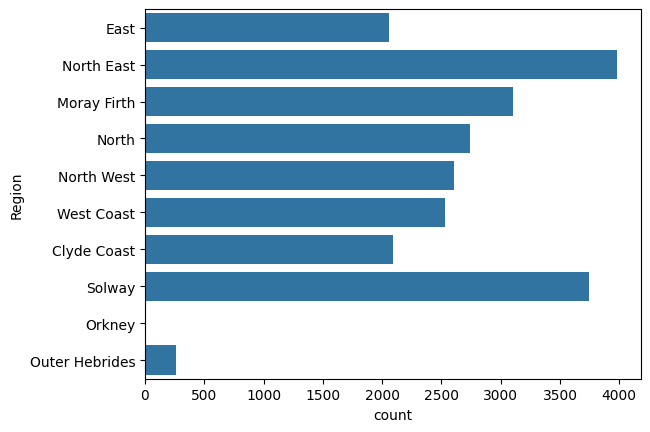

In [5]:
#Let's check the distribution of data across the different regions
sns.countplot(dataframe_copy['Region'])
#For more detailed numbers, we can use this function
print(dataframe_copy['Region'].value_counts())

In [10]:
#Due to the very small sample size of data from the "Orkney" region, we will remove this region from our dataset
def remove_region(df, region):
    df = df[df.Region != region]
    print(f"Number of regions in the dataset after removing {region}: {df['Region'].nunique()}")
    print(f"Regions in the dataset after removing {region}:\n{df['Region'].value_counts()}")
    return df

dataframe_copy = remove_region(dataframe_copy, 'Orkney')

Number of regions in the dataset after removing Orkney: 9
Regions in the dataset after removing Orkney:
Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Name: count, dtype: int64


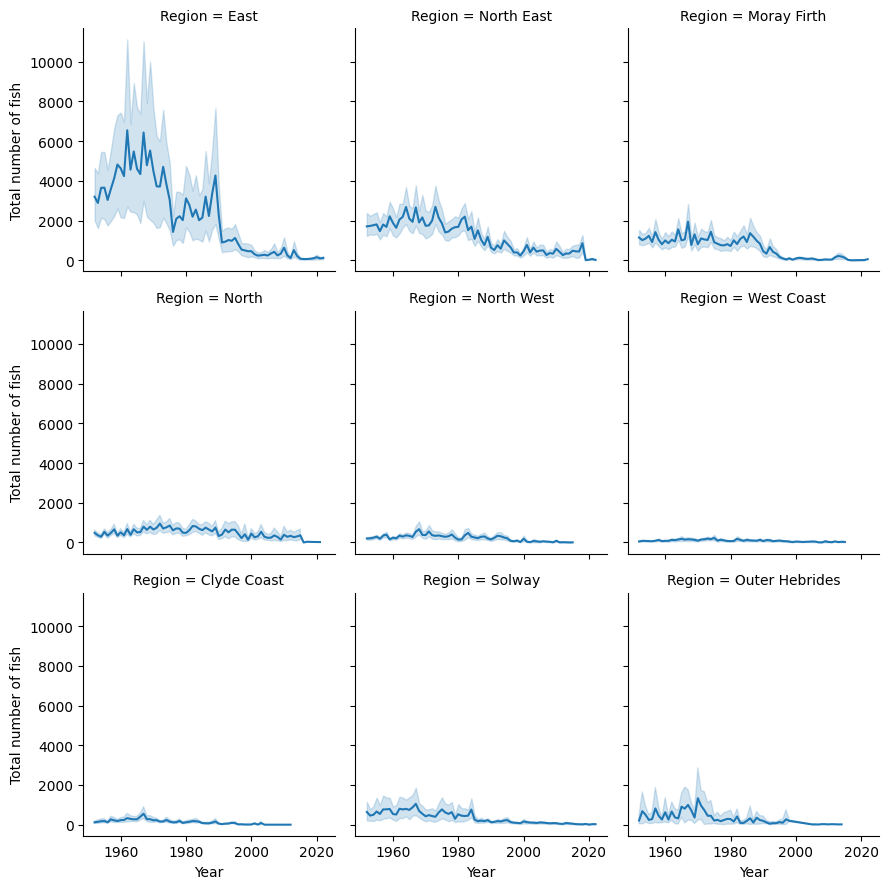

In [11]:
#We can also see how the number of fish caught varies across different years in each region. To do this, we need to add a column which sums up the number of fish.
def add_total_fish_column(df):
    df['Total number of fish'] = df['Wild 1SW number'] + df['Wild MSW number'] + df['Sea trout number'] + df['Finnock number'] + df['Farmed 1SW number'] + df['Farmed MSW number']
    return df

dataframe_copy = add_total_fish_column(dataframe_copy)
#Now we can plot the data
plot = sns.FacetGrid(dataframe_copy, col='Region', col_wrap=3)
plot.map(sns.lineplot, 'Year', 'Total number of fish')

Before we proceed with further analysis, we should prepare our data by transforming it into numerical data.

In [12]:
#Transforming the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

def transform_categorical_data(df):
    df['District'] = LabelEncoder().fit_transform(df['District'])
    df['Region'] = LabelEncoder().fit_transform(df['Region'])
    df['Month'] = LabelEncoder().fit_transform(df['Month'])
    df['Method'] = LabelEncoder().fit_transform(df['Method'])
    return df

dataframe_copy = transform_categorical_data(dataframe_copy)
dataframe_copy.head()

,District,District ID,Report order,Region,Method,Year,Month,Month number,Wild MSW number,Wild MSW weight (kg),...,Sea trout number,Sea trout weight (kg),Finnock number,Finnock weight (kg),Farmed MSW number,Farmed MSW weight (kg),Farmed 1SW number,Farmed 1SW weight (kg),Netting effort,Total number of fish
0,90,101.0,1.0,1,1,1952.0,2,2.0,107.0,400.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,107.0
1,90,101.0,1.0,1,3,1952.0,2,2.0,6606.0,24856.9,...,453.0,705.8,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7059.0
2,90,101.0,1.0,1,1,1952.0,5,3.0,185.0,703.1,...,13.0,21.3,0.0,0.0,0.0,0.0,0.0,0.0,10.0,198.0
3,90,101.0,1.0,1,3,1952.0,5,3.0,7008.0,26151.9,...,848.0,1172.5,0.0,0.0,0.0,0.0,0.0,0.0,31.0,7857.0
4,90,101.0,1.0,1,1,1952.0,0,4.0,484.0,1912.3,...,14.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,498.0


<Axes: >

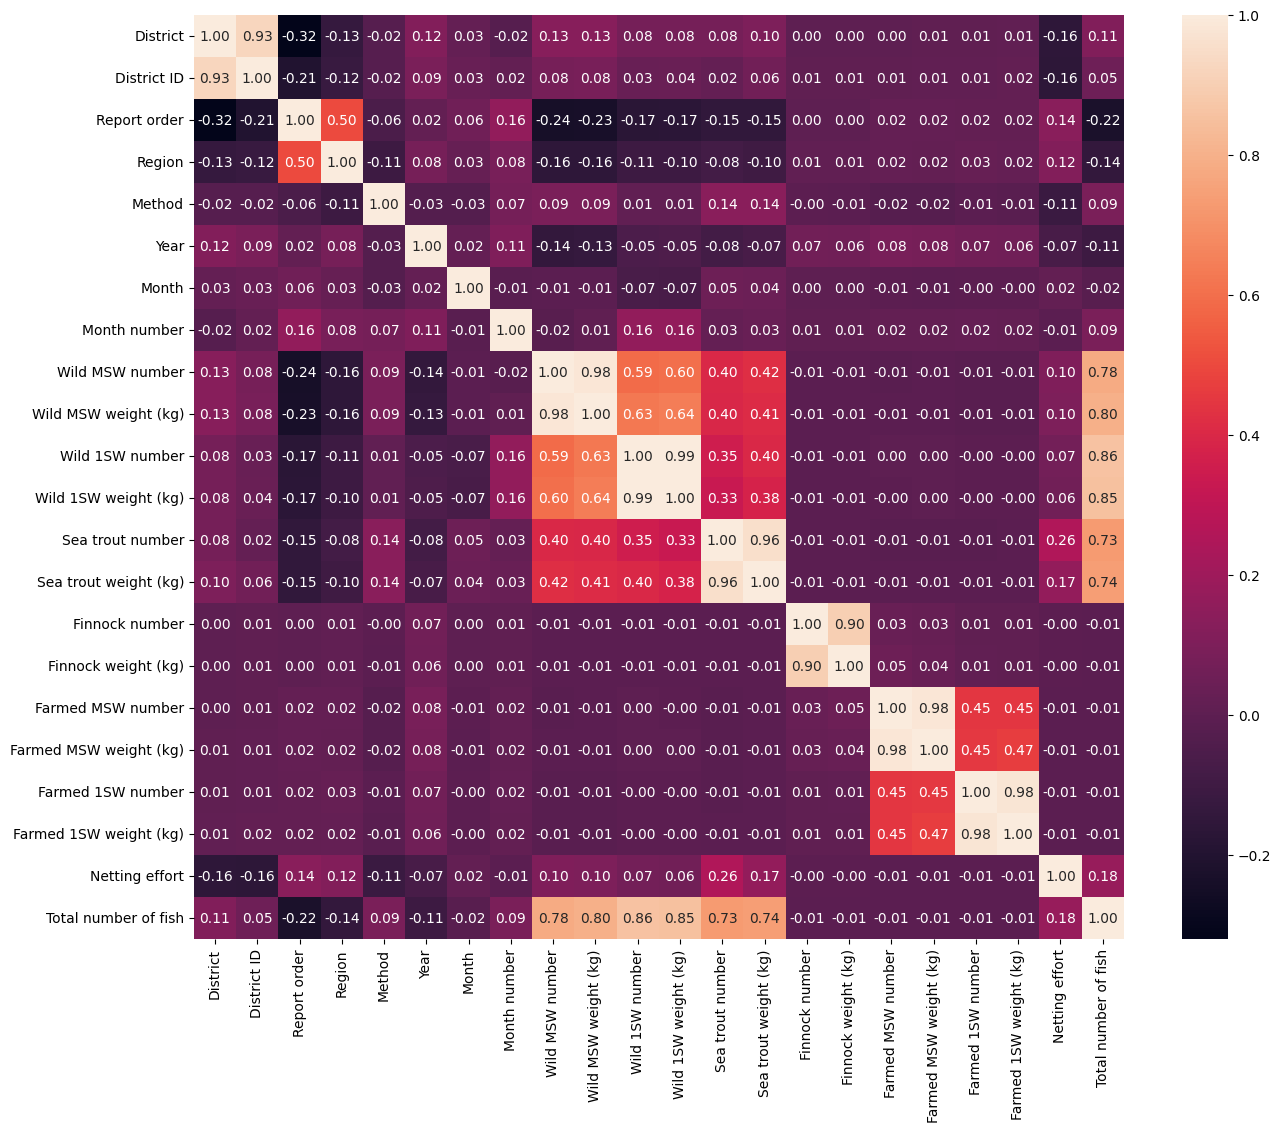

In [13]:
#Let's now examine the correlation between the data
correlation = dataframe_copy.corr()
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True, fmt=".2f")

In [15]:
#Lets create a pipeline to perform the data preprocessing to our intact dataset with all the steps we have done so far
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

pipeline = Pipeline([
    ('remove_missing_values', FunctionTransformer(remove_missing_values)),
    ('remove_region', FunctionTransformer(remove_region, kw_args={'region': 'Orkney'})),
    ('add_total_fish_column', FunctionTransformer(add_total_fish_column)),
    ('transform_categorical_data', FunctionTransformer(transform_categorical_data))
])

transformed_data = pipeline.fit_transform(dataframe)

Are there any missing values left in the dataset? False
Number of regions in the dataset after removing Orkney: 9
Regions in the dataset after removing Orkney:
Region
North East        3983
Solway            3746
Moray Firth       3105
North             2744
North West        2610
West Coast        2527
Clyde Coast       2096
East              2061
Outer Hebrides     265
Name: count, dtype: int64


After the initial data analysis, we can proceed to split the data into training, validation, and test sets, and write a function for training the models

In [16]:
#Splitting the data into training and testing sets
X = transformed_data.drop('Region', axis=1)
Y = transformed_data['Region']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
#Function to train the model
def train_model(model, X_train, Y_train, X_test, Y_test):
    print('Training model... ')
    model.fit(X_train, Y_train)
    print('Model trained')

    predictions = model.predict(X_test)
    #Calculating the precision, recall, f1-score and accuracy of the model and putting them in a list
    scores = list(metrics.precision_recall_fscore_support(Y_test, predictions, zero_division=1))
    score_vals = [
        scores[0][0],
        scores[1][0],
        scores[2][0]
    ]

    score_vals.append(metrics.accuracy_score(Y_test, predictions))

    return score_vals

In [18]:
#MODEL 1 - Logistic Regressionu
#We used a different solver than the default one because the default solver didn't perform well - our data was not suitable for the default solver, even when increasing the number of iterations to almost a million, so we used the 'liblinear' solver, which worked much better.
lr_accuracy = train_model(LogisticRegression(solver='liblinear', max_iter=10000), X_train, Y_train, X_test, Y_test)
accuracy_comparison = {'Logistic Regression' : lr_accuracy}
print('Logistic Regression accuracy: ', lr_accuracy)

Training model... 
Model trained
Logistic Regression accuracy:  [0.7159533073929961, 0.423963133640553, 0.5325615050651229, 0.7759291270527225]


In [19]:
#MODEL 2 - Random Forest
rf_accuracy = train_model(RandomForestClassifier(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Random Forest'] = rf_accuracy
print('Random Forest accuracy: ', rf_accuracy)
#Since the result is perfect, let's validate it using cross-validation
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, Y_train, cv=5)
print("Cross-validated scores:", scores)
#As we can see, the results are still excellent, so most likely, the data is too simple for this model

Training model... 
Model trained
Random Forest accuracy:  [1.0, 0.9976958525345622, 0.9988465974625144, 0.9995678478824547]
Cross-validated scores: [0.99945975 0.99945975 0.99972988 1.         1.        ]


In [20]:
#MODEL 3 - Support Vector Machine
svc_accuracy = train_model(SVC(kernel='linear'), X_train, Y_train, X_test, Y_test) #We used a linear kernel because it better fits our data
accuracy_comparison['Support Vector Machine'] = svc_accuracy
print('Support Vector Machine accuracy: ', svc_accuracy)


Training model... 
Model trained
Support Vector Machine accuracy:  [1.0, 1.0, 1.0, 0.9995678478824547]


In [21]:
#MODEL 4 - Naive Bayes
ng_accuracy = train_model(GaussianNB(), X_train, Y_train, X_test, Y_test)
accuracy_comparison['Naive Bayes'] = ng_accuracy
print('Naive Bayes accuracy: ', ng_accuracy)

Training model... 
Model trained
Naive Bayes accuracy:  [0.6357466063348416, 0.6474654377880185, 0.6415525114155252, 0.8083405358686258]


In [22]:
#Model 4 - Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp_accuracy = train_model(mlp, X_train, Y_train, X_test, Y_test)
accuracy_comparison['Neural Network'] = mlp_accuracy
print('Neural Network accuracy: ', mlp_accuracy)

Training model... 
Model trained
Neural Network accuracy:  [0.9927536231884058, 0.9470046082949308, 0.9693396226415093, 0.9658599827139153]


<Axes: >

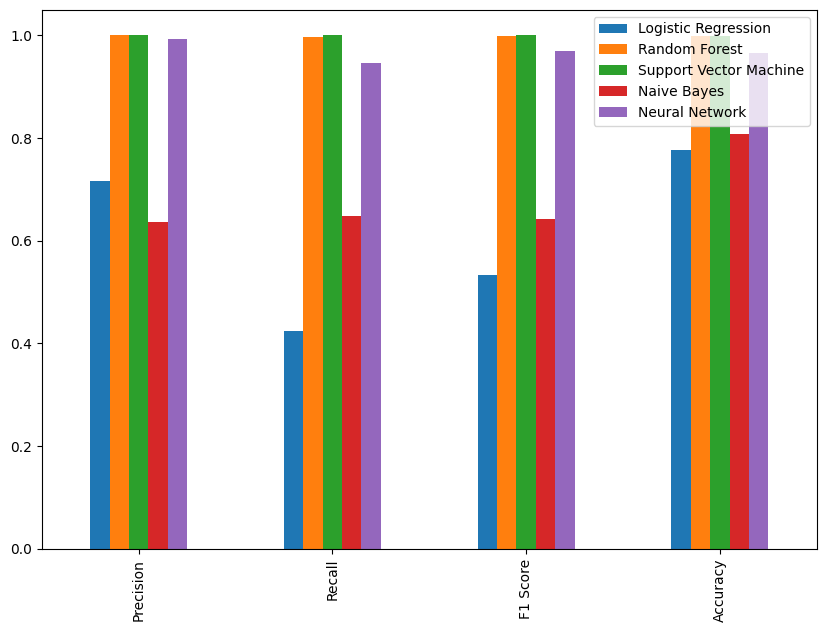

In [24]:
#Visualizing models results
accuracy_df = pd.DataFrame(accuracy_comparison, index=['Precision', 'Recall', 'F1 Score', 'Accuracy'])
accuracy_df.plot(kind='bar', figsize=(10, 7))

As we can see, in our problem, the model using Random Forests and SVM performed the best, they adapted well to our data, which is not huge but has quite a wide range and many relations between features, where logistic regression and Naive Bayes classifier did not perform very well. A simple neural network achieved worse results than Random Forest and SVM, but they are still at a high level.

Our data isn't massive, so it's evident that more powerful and complex algorithms perform significantly better.

Of course, the presented models did not go through detailed tuning. However, I wanted to showcase a few models in their basic form to compare how they perform on our data.

Besides this classification problem, I have prepared second one that is typical regression problem. You can find it in my second notebook salmon-statistics-analysis-regression.ipynb :D